# 10장. 차원 축소 (Dimension Reduction) 과제

In [1]:
!pip install seaborn

## 1. 데이터셋

In [2]:
import matplotlib.pyplot as plt
import os
from typing import List, Tuple
import csv
from scratch.linear_algebra import Vector, get_column

###  1.1 데이터셋 다운로드

In [3]:
import requests

dataset_path = os.path.join('data', 'wdbc.data')
if os.path.exists(dataset_path) is False:
    data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")

    with open(dataset_path, "w") as f:
      f.write(data.text)

### 1.2 데이터 파싱

In [4]:
def parse_cancer_row(row: List[str]) -> Tuple[Vector, int]:
    measurements = [float(value) for value in row[2:]]
    label = row[1]
    label = 1 if label == 'M' else 0
    return measurements, label

### 1.3 데이터 읽기
위스콘신 유방암 진단 데이터셋  (Wisconsin Breast Cancer Diagnostic dataset)
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [5]:
X_cancer : List[Vector] = []
y_cancer : List[int] = []
with open(dataset_path) as f:
    reader = csv.reader(f)
    for row in reader:
        x, y = parse_cancer_row(row)
        X_cancer.append(x)
        y_cancer.append(y)

In [6]:
print(X_cancer[0])
print(y_cancer[0])

[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
1


#### 1.4 데이터 컬럼명

In [7]:
columns = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
    "compactness_mean", "concavity_mean", "points_mean", "symmetry_mean", "dimension_mean", 
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", 
    "compactness_se", "concavity_se", "points_se", "symmetry_se", "dimension_se", 
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
    "compactness_worst", "concavity_worst", "points_worst", "symmetry_worst", "dimension_worst",
    ]

## 2. 데이터 탐색

### 2.1 클래스 비율 확인

In [8]:
from collections import defaultdict
label_type = defaultdict(int)
for y in y_cancer:
    label = 'M' if y == 1 else 'B'
    label_type[label] += 1

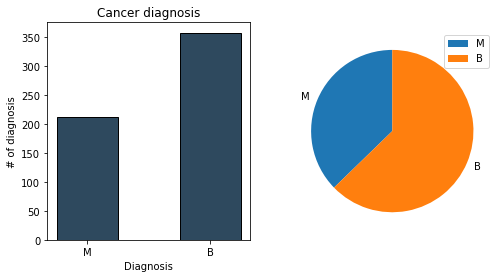

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.bar(label_type.keys(),
        label_type.values(),
        0.5,
        facecolor="#2E495E",
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.xlabel("Diagnosis")
plt.ylabel("# of diagnosis")
plt.title("Cancer diagnosis")

plt.subplot(1, 2, 2)
pies = plt.pie(label_type.values(),
               labels=label_type.keys(),
               startangle=90)
plt.legend()
plt.show()

### 2.2 특징 별 히스토그램

In [10]:
from matplotlib import pyplot as plt
from typing import Dict

def draw_histogram(data: List[Vector], 
                   column_names: List[str], 
                   max_columns: int = 5):
    
    num_variables = len(data[0])
    num_rows = (num_variables-1)//max_columns + 1
    num_cols = num_variables if num_rows == 1 else max_columns
      
    def get_ax(row, col):
        if num_rows == 1 and num_cols == 1 :
            current_ax = ax
        elif num_rows == 1:
            current_ax = ax[col]
        else:
            current_ax = ax[row][col]
            
        return current_ax
    
    def histogram(ax, data, column_name):

        n, bins, patches = ax.hist(data,
                                    8,
                                    facecolor="#2E495E",
                                    edgecolor=(0, 0, 0)) 

        ax.set_title(column_name, fontsize=8)

    fig, ax = plt.subplots(num_rows,
                           num_cols, 
                           figsize=(num_cols*4, num_rows*4))

    for row in range(num_rows):
        for col in range(num_cols):
            data_index = num_cols * row + col
            current_ax = get_ax(row, col)
            histogram(current_ax, 
                      get_column(data, data_index), 
                      column_names[data_index])

    plt.show()

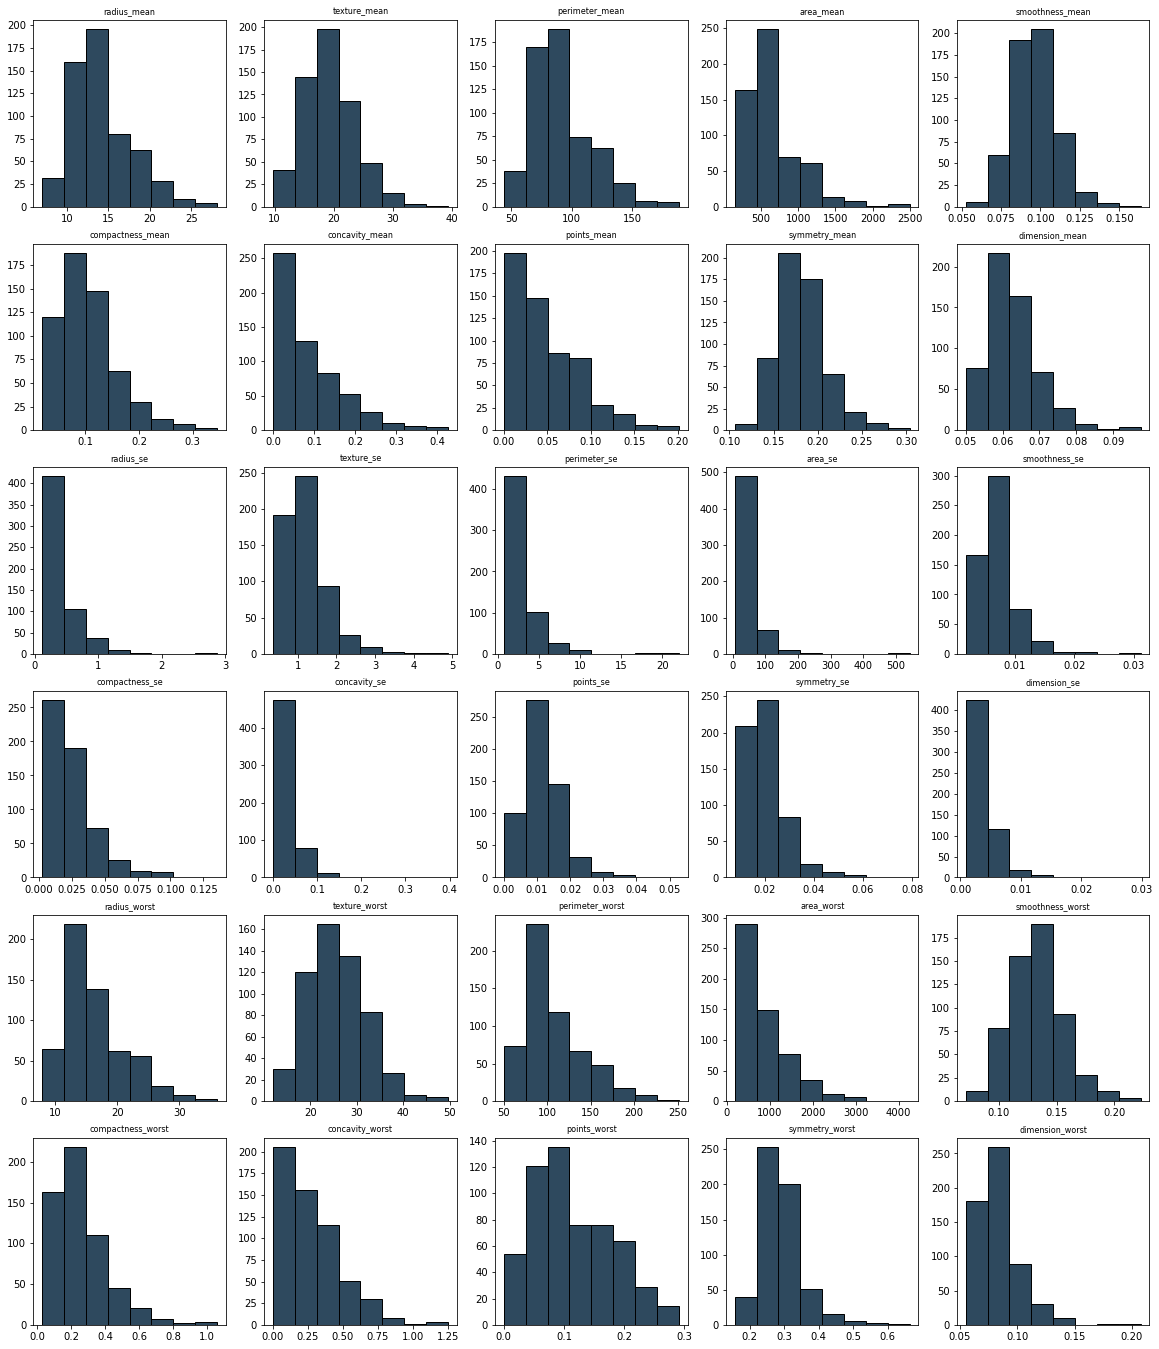

In [11]:
draw_histogram(X_cancer, columns)

### 2.3 특징 쌍 별 산포도

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

def draw_scatter(points_by_class: Dict[str, List[Vector]], 
                 column_names: List[str], 
                 index_pairs: List[List], 
                 max_columns:int = 5):
    
    num_rows = (len(index_pairs)-1)//max_columns + 1
    num_cols = len(index_pairs) if num_rows == 1 else max_columns

    fig, ax = plt.subplots(num_rows, num_cols, 
                           figsize=(num_cols*5, num_rows*5))
    rgb_values = sns.color_palette("pastel", len(points_by_class))
    
    def get_ax(row, col):
        if num_rows == 1 and num_cols == 1 :
            current_ax = ax
        elif num_rows == 1:
            current_ax = ax[col]
        else:
            current_ax = ax[row][col]
            
        return current_ax

    for row in range(num_rows):
        for col in range(num_cols):
            i, j = pairs[num_cols * row + col]
            current_ax = get_ax(row, col)
            current_ax.set_title(f"{column_names[i]} vs {column_names[j]}", 
                                 fontsize=8)
            current_ax.set_xticks([])
            current_ax.set_yticks([])

            for k, (class_type, points) in enumerate(points_by_class.items()):
                xs = [point[i] for point in points]
                ys = [point[j] for point in points]
                current_ax.scatter(xs, ys, color=rgb_values[k], s=10, 
                                   label=class_type)

    last_ax = get_ax(-1, -1)
    last_ax.legend(loc='lower right', prop={'size': 8})
    plt.show()

In [13]:
from typing import Dict
points_by_diagnosis: Dict[str, List[Vector]] = defaultdict(list)
for i, x in enumerate(X_cancer):
    y = y_cancer[i]
    label = 'M' if y == 1 else 'B'
    points_by_diagnosis[label].append(x)

In [14]:
start = 0
end = start + 10
pairs = [(i, j) for i in range(start, end) for j in range(i+1, end) if i < j]
marks = ['+', '.']  # 추가함.
print(pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


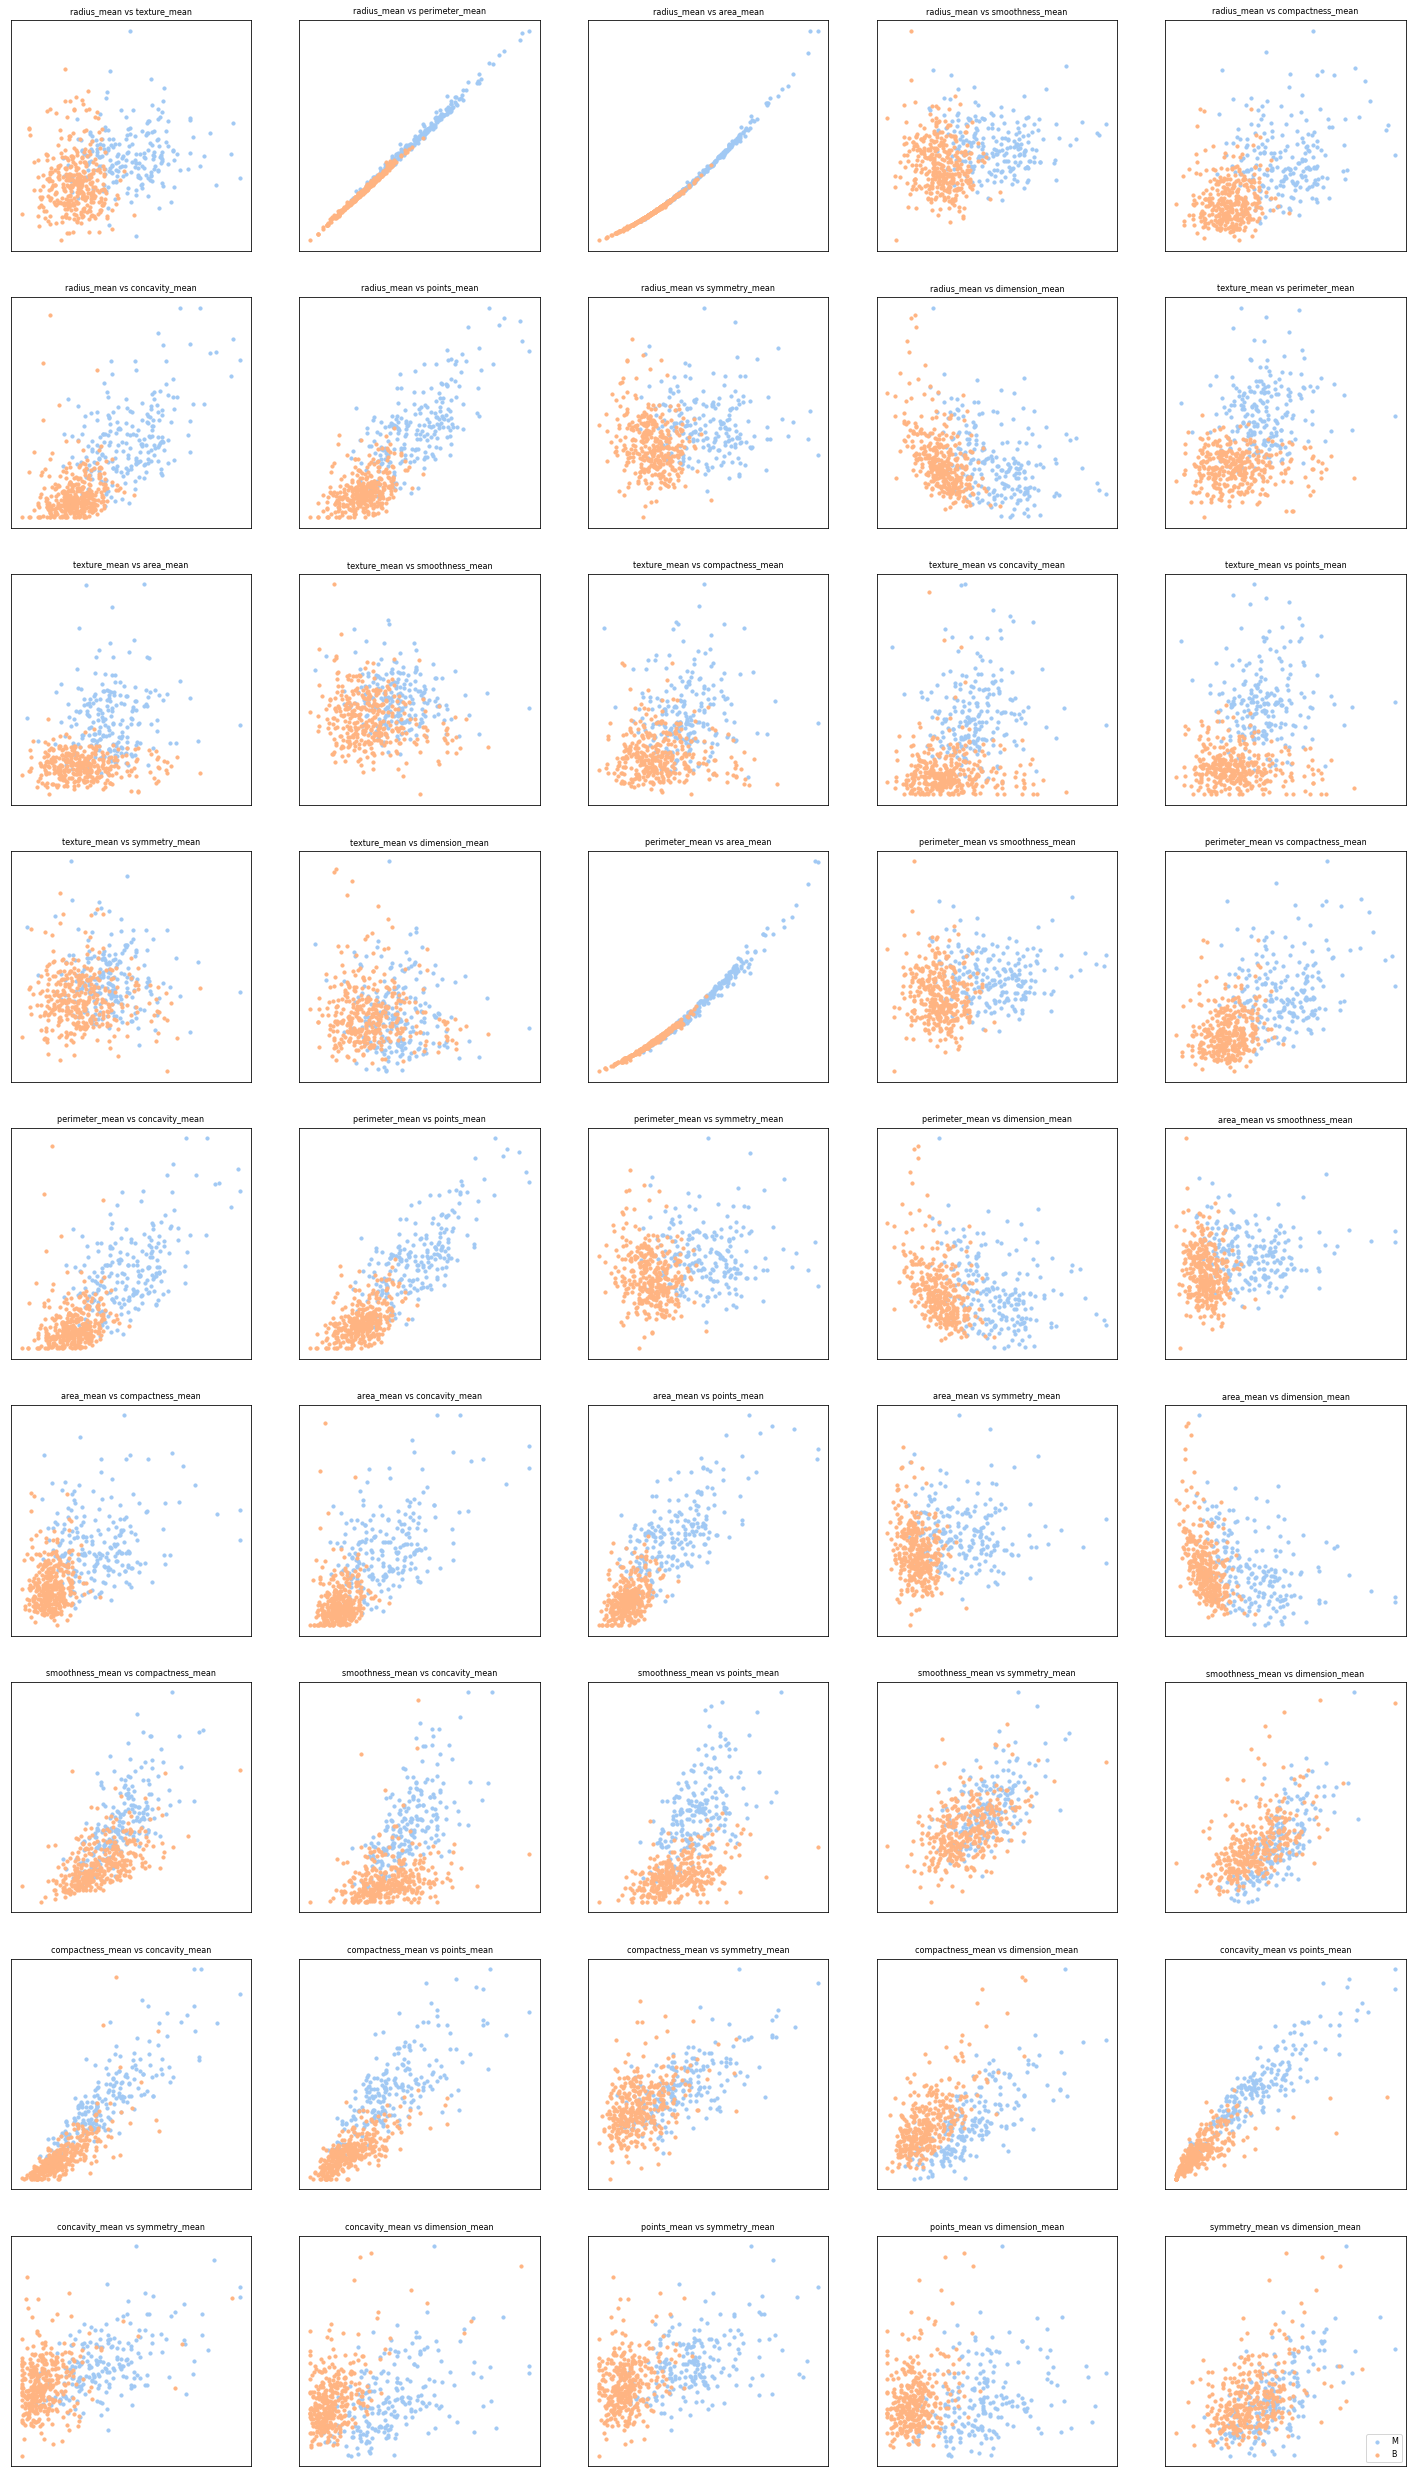

In [15]:
draw_scatter(points_by_diagnosis, columns, pairs)

## 3. 데이터 전처리

### 3.1 데이터 표준화 (Standardization)

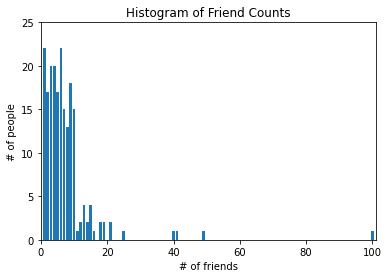

In [16]:
from scratch.working_with_data import scale, rescale

def normalization(data: List[Vector],
                  means : Vector = None,
                  stdevs : Vector = None) -> List[Vector]:
    dim = len(data[0])
    if means is None : 
        means, stdevs = scale(data)

    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled, means, stdevs

## 4. 로지스틱 회귀

### 4.1 모델 훈련 

In [17]:
import random
import tqdm
import IPython.display as display
from scratch.linear_algebra import Vector, vector_mean, dot
from scratch.gradient_descent import gradient_step
from scratch.logistic_regression import logistic, negative_log_gradient
from scratch.logistic_regression import negative_log_likelihood

def logistic_regression(xs: List[Vector],
                        ys: List[float],
                        learning_rate: float = 0.001,
                        num_steps: int = 1000,
                        batch_size: int = 1) -> Vector:

    # Start with a random guess
    beta = [random.random() for _ in range(len(xs[0]))]

    with tqdm.trange(num_steps) as t:
        for epoch in t:
            for start in range(0, len(xs), batch_size):
                batch_xs = xs[start:start+batch_size]
                batch_ys = ys[start:start+batch_size]

                gradient = negative_log_gradient(batch_xs, batch_ys, beta)
                beta = gradient_step(beta, gradient, -learning_rate)
                loss = negative_log_likelihood(batch_xs, batch_ys, beta)
            t.set_description(f"epoch {epoch} : loss - {loss:.3f}")

    return beta

### 4.2 모델 테스트

In [18]:
# 모델테스트를 과제로 제출 했었던 16.Logistic Regression에서 (Q6)을 가져와서 변형
# 시켰습니다.
def test(inputs, labels, beta, x_test_normed):  # 함수에 x_test_normed 인자 추가
    i=0   # i 변수 추가
    TP = FP = FN = TN = 0
    for x, y in zip(inputs, labels):
        # x_test_normed 으로 로지스틱하는 prediction(모델예측)변수 추가
        prediction = [logistic(dot(beta, x_i)) for x_i in x_test_normed]
            
        if y == 1 and prediction[i] >= 0.5:  # TP: paid and we predict paid
            TP += 1
        elif y == 1:                      # FN: paid and we predict unpaid
            FN += 1
        elif prediction[i] >= 0.5:             # FP: unpaid and we predict paid
            FP += 1
        else:                               # TN: unpaid and we predict unpaid
            TN += 1
        i +=1
    confusion_matrix = [[TP, FP], [FN, TN]]
    return confusion_matrix

## 5. 차원 축소 적용

### 5.1 차원 축소

In [19]:
from scratch.working_with_data import pca, transform
num_components = 2
components = pca(X_cancer, num_components)
X_cancer_dimension_reducted = transform(X_cancer, components)

dv: 6152606.816: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.91it/s]


In [20]:
columns_dimension_reducted = ['Dim '+ str(i+1) for i in range(num_components)]

### 5.2 차원 축소 후 특징 별 히스토그램

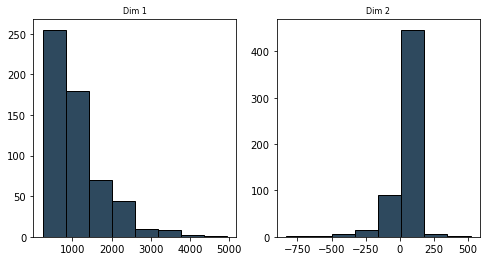

In [21]:
draw_histogram(X_cancer_dimension_reducted, columns_dimension_reducted)
# print(columns_dimension_reducted)

### 5.3 차원 축소 후 특징 쌍 별 산포도

In [22]:
from typing import Dict
points_by_diagnosis_reducted: Dict[str, List[Vector]] = defaultdict(list)
for i, x in enumerate(X_cancer_dimension_reducted):
    y = y_cancer[i]
    label = 'M' if y == 1 else 'B'
    points_by_diagnosis_reducted[label].append(x)

In [23]:
start = 0
end = start + num_components
reducted_pairs = [(i, j) for i in range(start, end) 
                         for j in range(i+1, end) if i < j]
print(reducted_pairs)

[(0, 1)]


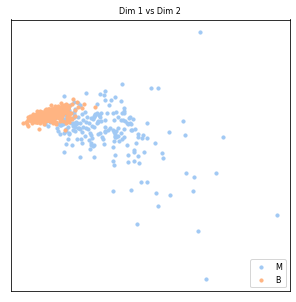

In [24]:
draw_scatter(points_by_diagnosis_reducted, columns_dimension_reducted, reducted_pairs)

### 5.4 차원 축소 후 회귀 분석  (Q1)
차원 축소 후 회귀 분석을 하는 코드를 작성하시오.

In [25]:
import random
from scratch.machine_learning import train_test_split
from typing import Tuple

def logistic_regression_dimension_reduction(
                        xs: List[Vector],
                        ys: List[float],
                        num_components: int) -> Tuple[List[Vector], Vector, List[List]]:
    # 1. 차원 축소
    components = pca(xs, num_components)
    xs_dimension_reducted = transform(xs, components)
    # print(len(xs_dimension_reducted[0]))
    # 2. 데이터 분할
    random.seed(12)
    x_train, x_test, y_train, y_test = train_test_split(xs_dimension_reducted, ys, 0.25)
    # print(y_train)
    # 3. 데이터 표준화
    x_train_normed, x_train_means, x_train_stdevs = normalization(x_train)
    x_test_normed, _, _  = normalization(x_test, x_train_means, x_train_stdevs)
    # 4. 회귀 분석 밑 테스트
    beta = logistic_regression(x_train_normed, y_train)
    
    
    confusion_matrix = test(x_test, y_test, beta, x_test_normed)
    
    return xs_dimension_reducted, beta, confusion_matrix


2차원에 대해서 테스트 했을 때 결과는 다음과 같이 나오는 것을 확인해 보세요.
* [[36, 0], [15, 92]]
* accuracy : 0.8951048951048951
* precision : 1.0
* recall : 0.7058823529411765
* f1_score : 0.8275862068965517

In [26]:
from scratch.machine_learning import accuracy, precision, recall, f1_score
num_components = 2
X_cancer_dimension_reducted, beta, confusion_matrix = \
    logistic_regression_dimension_reduction(X_cancer, y_cancer, num_components)

# 성능 분석
print(confusion_matrix)
[TP, FP], [FN, TN] = confusion_matrix
print("accuracy :", accuracy(TP, FP, FN, TN))
print("precision :", precision(TP, FP, FN, TN))
print("recall :", recall(TP, FP, FN, TN))
print("f1_score :", f1_score(TP, FP, FN, TN))

epoch 999 : loss - 0.009: 100%|███████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.80it/s]


[[36, 0], [15, 92]]
accuracy : 0.8951048951048951
precision : 1.0
recall : 0.7058823529411765
f1_score : 0.8275862068965517


## 6. 최적의 차원 찾기 (Q2)
1차원에서 15차원까지 각 차원 별로 성능을 확인하고 성능 그래프를 그려보시오.

dv: 774881.119: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.38it/s]


epoch 999 : loss - 0.001: 100%|████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.49it/s]


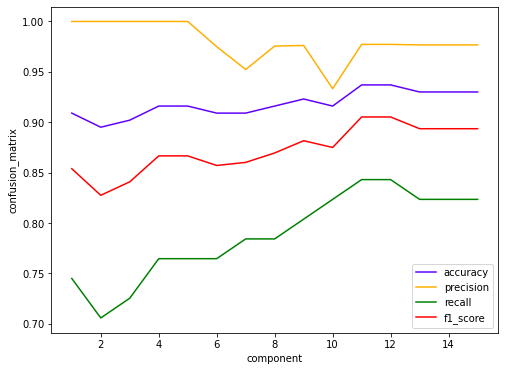

In [27]:
from scratch.machine_learning import accuracy, precision, recall, f1_score

start_num_components = 1
end_num_components = 15
a = []
p = []
r = []
f1 = []
for x in range(start_num_components,end_num_components+1):
    X_cancer_dimension_reducted, beta, confusion_matrix = \
        logistic_regression_dimension_reduction(X_cancer, y_cancer, x)
    [TP, FP], [FN, TN] = confusion_matrix
    a.append(accuracy(TP, FP, FN, TN))
    p.append(precision(TP, FP, FN, TN))
    r.append(recall(TP, FP, FN, TN))
    f1.append(f1_score(TP, FP, FN, TN))

plt.figure(figsize=(8,6))
x_value = [x for x in range(start_num_components,end_num_components+1)]

plt.plot(x_value, a, color = '#5f00ff', label ='accuracy')
plt.plot(x_value, p, color = '#ffaf00', label ='precision')
plt.plot(x_value, r, color = '#008000', label ='recall')
plt.plot(x_value, f1, color = '#ff0000', label ='f1_score')
plt.xlabel('component')
plt.ylabel('confusion_matrix')
plt.legend()